# introduction

In this project we work extensivly with camera calibration and point transformations. Phase 1 of this project uses captures of a chessboard to calibrate the computer's camera. In the next phase I use that calibration to generate rotaion and translation matrices for the data, these matrices can be used on generated points to create an AR object.

In [ ]:
import cv2 as cv
import numpy as np
import datetime
import os

# Camera index (0 is usually the default webcam)
CAM_INDEX = 0
CHESSBOARD_SIZE = (7, 6)  # (columns, rows)

# prepare object points (unused for camera save but kept if needed later)
objp = np.zeros((CHESSBOARD_SIZE[0] * CHESSBOARD_SIZE[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHESSBOARD_SIZE[0], 0:CHESSBOARD_SIZE[1]].T.reshape(-1, 2)

# make directory to save captures
SAVE_DIR = "captures"

cap = cv.VideoCapture(CAM_INDEX)
if not cap.isOpened():
    print("ERROR: Could not open camera.")
    raise SystemExit

print("Press 'q' to quit. When a chessboard is detected press 's' to save the current frame.")

prev_found = False
while True:
    ret, frame = cap.read()
    if not ret:
        print("ERROR: Failed to grab frame.")
        break

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    found, corners = cv.findChessboardCorners(gray, CHESSBOARD_SIZE, None)

    if found:
        # refine corner locations
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        #cv.drawChessboardCorners(frame, CHESSBOARD_SIZE, corners2, found)

        # Notify user (console and overlay) only when detection state changes to found
        if not prev_found:
            print("Chessboard found. Press 's' to save this frame.")
            prev_found = True

        cv.putText(frame, "Chessboard found - press 's' to save", (10, 30),
                   cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv.LINE_AA)
    else:
        prev_found = False
        cv.putText(frame, "No chessboard detected", (10, 30),
                   cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv.LINE_AA)

    cv.imshow("Chessboard Capture", frame)

    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    if key == ord('s') and found:
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = os.path.join(SAVE_DIR, f"chessboard_{timestamp}.png")
        cv.imwrite(filename, frame)
        print(f"Saved: {filename}")

cap.release()
cv.destroyAllWindows()

Press 'q' to quit. When a chessboard is detected press 's' to save the current frame.


In [ ]:
square_size = 25.0

grid_w, grid_h = 6, 7  
objp_single = np.zeros((grid_w * grid_h, 3), dtype=np.float32)
objp_single[:, :2] = np.mgrid[0:grid_w, 0:grid_h].T.reshape(-1, 2) * square_size
print("Object points for a single view:\n", objp_single)

Object points for a single view:
 [[  0.   0.   0.]
 [ 25.   0.   0.]
 [ 50.   0.   0.]
 [ 75.   0.   0.]
 [100.   0.   0.]
 [125.   0.   0.]
 [  0.  25.   0.]
 [ 25.  25.   0.]
 [ 50.  25.   0.]
 [ 75.  25.   0.]
 [100.  25.   0.]
 [125.  25.   0.]
 [  0.  50.   0.]
 [ 25.  50.   0.]
 [ 50.  50.   0.]
 [ 75.  50.   0.]
 [100.  50.   0.]
 [125.  50.   0.]
 [  0.  75.   0.]
 [ 25.  75.   0.]
 [ 50.  75.   0.]
 [ 75.  75.   0.]
 [100.  75.   0.]
 [125.  75.   0.]
 [  0. 100.   0.]
 [ 25. 100.   0.]
 [ 50. 100.   0.]
 [ 75. 100.   0.]
 [100. 100.   0.]
 [125. 100.   0.]
 [  0. 125.   0.]
 [ 25. 125.   0.]
 [ 50. 125.   0.]
 [ 75. 125.   0.]
 [100. 125.   0.]
 [125. 125.   0.]
 [  0. 150.   0.]
 [ 25. 150.   0.]
 [ 50. 150.   0.]
 [ 75. 150.   0.]
 [100. 150.   0.]
 [125. 150.   0.]]


In [28]:
# gather image files from existing SAVE_DIR
images = sorted(
    [os.path.join(SAVE_DIR, f) for f in os.listdir(SAVE_DIR)
     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
)
print(images)

['C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_144639.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_144643.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_144658.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_144719.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_144835.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_145022.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_145404.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_145407.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_145857.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_145858.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_20251106_150108.png', 'C:\\Users\\Boone Pool\\CSC391\\Project2\\captures\\chessboard_2

In [29]:



if not images:
    print("No capture images found in", SAVE_DIR)
else:
    objpoints = []  # 3d point in real world space
    imgpoints = []  # 2d points in image plane
    last_gray_shape = None

    for fname in images:
        img = cv.imread(fname)
        if img is None:
            print("Warning: failed to read", fname)
            continue
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        last_gray_shape = (gray.shape[1], gray.shape[0])  # (width, height)

        found, corners = cv.findChessboardCorners(gray, (grid_w, grid_h), None)
        if not found:
            print("Chessboard not found in", os.path.basename(fname))
            continue


        objpoints.append(objp_single.copy())   # same object points for each view
        imgpoints.append(corners)             # use refined corners (Nx1x2)

    # calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(
        objpoints, imgpoints, last_gray_shape, None, None
    )


    print("Calibration successful:", bool(ret))
    print("Camera matrix (intrinsic):\n", mtx)
    print("Distortion coefficients:\n", dist.ravel())

    # save calibration


Chessboard not found in chessboard_20251106_150653.png
Calibration successful: True
Camera matrix (intrinsic):
 [[616.39820379   0.         325.9387705 ]
 [  0.         615.84824381 246.5200076 ]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [-0.06856011  0.43484527  0.00751972  0.00766302 -0.63311719]


# Phase 1
My computer for this project is a dell XPS 15 that comes with a 1 MP (1280 x 720) camera. I took 27 captures of the chessboard in order to insure I got an accurate intrinsic matrix result. Using the calibrate camera and undistort command I was able to generate the intrinsic matrix then use it to reverse the distortions in the camera. The difference in the undistorted image is hard to see in this data due to the preproccessing done by the machine. 

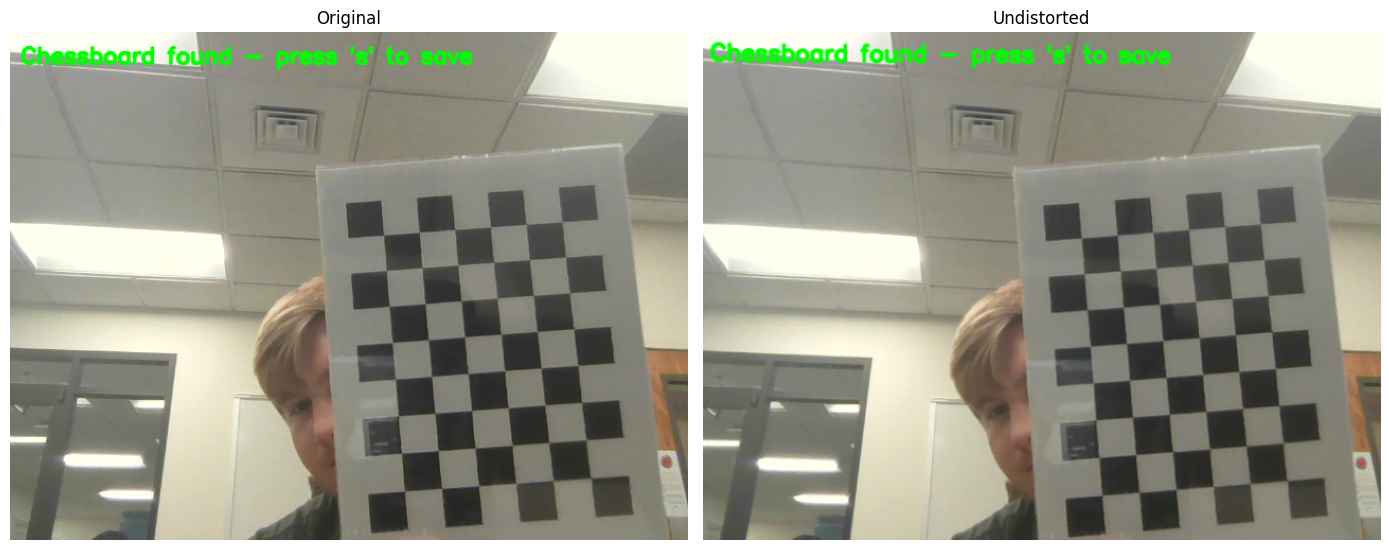

In [33]:
import matplotlib.pyplot as plt

# pick a test image (use existing variable `img` if present)
test_img = cv.imread(images[3])
corners2 = imgpoints[3]  # use existing detected corners for that image


h, w = test_img.shape[:2]
alpha = 0.0  # 0=zoomed in, 1=all pixels retained
# get optimal new camera matrix and undistort
new_mtx, valid_roi = cv.getOptimalNewCameraMatrix(
    mtx, dist, (w, h),
    alpha,
    (w, h)
)

undistorted = cv.undistort(test_img, mtx, dist, None, new_mtx)

# visualize original vs undistorted and optionally show corner positions
orig_vis = test_img.copy()
undist_vis = undistorted.copy()


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].imshow(cv.cvtColor(orig_vis, cv.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[1].imshow(cv.cvtColor(undist_vis, cv.COLOR_BGR2RGB))
axes[1].set_title("Undistorted")
for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()

# Phase 2
In phase 2 the AR cube is created. This works by taking the camera distortion calculated previously along with the chessboard corners in the image to return the rotation and translation matrices. The AR cube is initilized using the squares as a reference, Then using the rotation and translation matrices you can move them into the image space. This give you the locations that the corners should be at then it is just a matter of plotting them. 

rvec:
 [ 0.01461505 -0.1822765  -0.01224103]
tvec:
 [ 83.71842169   7.652011   460.44038703]
Mean reprojection error (on used corners): 0.6633 px


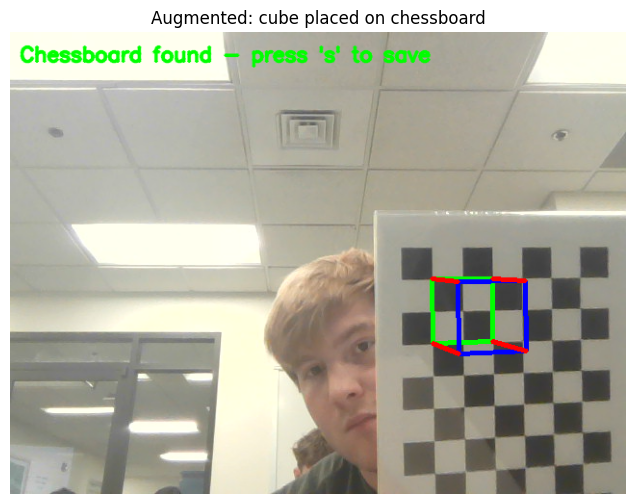

In [35]:
# Estimate camera pose from detected chessboard corners and render a virtual cube.
# Requires existing variables: mtx, dist, objp_single, corners2, test_img, square_size, plt, cv, np
test_img = cv.imread(images[4])
corners2 = imgpoints[4]

# choose 2D-3D correspondences (ensure counts match)
img_pts_all = corners2.reshape(-1, 2).astype(np.float32)
obj_pts_all = objp_single.reshape(-1, 3).astype(np.float32)

N = min(len(img_pts_all), len(obj_pts_all))
img_pts = img_pts_all[:N]
obj_pts = obj_pts_all[:N]

# solvePnP to get rotation and translation (object->camera)
success, rvec, tvec = cv.solvePnP(obj_pts, img_pts, mtx, dist, flags=cv.SOLVEPNP_ITERATIVE)
if not success:
    raise RuntimeError("solvePnP failed to find a pose.")

print("rvec:\n", rvec.ravel())
print("tvec:\n", tvec.ravel())

# optional: compute reprojection error for these correspondences
proj_pts, _ = cv.projectPoints(obj_pts, rvec, tvec, mtx, dist)
proj_pts = proj_pts.reshape(-1, 2)
reproj_err = np.linalg.norm(proj_pts - img_pts, axis=1).mean()
print(f"Mean reprojection error (on used corners): {reproj_err:.4f} px")

# define a cube in the chessboard coordinate frame.
# place cube base at the first inner corner (origin in obj_pts), cube_size in same units as objp (square_size)
cube_size = square_size * 2.0  # two squares wide/high
# vertices: base square (z=0), top square (z = -cube_size) so it pops out of the board toward the camera
cube_3d = np.array([
    [0, 0, 0],
    [cube_size, 0, 0],
    [cube_size, cube_size, 0],
    [0, cube_size, 0],
    [0, 0, -cube_size],
    [cube_size, 0, -cube_size],
    [cube_size, cube_size, -cube_size],
    [0, cube_size, -cube_size],
], dtype=np.float32)

# project cube points onto the image
cube_imgpts, _ = cv.projectPoints(cube_3d, rvec, tvec, mtx, dist)
cube_imgpts = cube_imgpts.reshape(-1, 2).astype(int)

# draw cube on a copy of the test image
vis = test_img.copy()
# base (green)
for i in range(4):
    p1 = tuple(cube_imgpts[i])
    p2 = tuple(cube_imgpts[(i + 1) % 4])
    cv.line(vis, p1, p2, (0, 255, 0), 3)
# top (blue)
for i in range(4, 8):
    p1 = tuple(cube_imgpts[i])
    p2 = tuple(cube_imgpts[4 + ( (i + 1 - 4) % 4 )])
    cv.line(vis, p1, p2, (255, 0, 0), 3)
# vertical edges (red)
for i in range(4):
    p1 = tuple(cube_imgpts[i])
    p2 = tuple(cube_imgpts[i + 4])
    cv.line(vis, p1, p2, (0, 0, 255), 3)

# show result inline
plt.figure(figsize=(8, 6))
plt.imshow(cv.cvtColor(vis, cv.COLOR_BGR2RGB))
plt.title("Augmented: cube placed on chessboard")
plt.axis("off")
plt.show()

# conclusion 

This project was incredibly interesting and informative and it gave me great insights into a lot of the topics we have used in the past. from the first day of class we learned the basic concept of learning distortions to fix them and it was cool to implement that in practice. The finding of chessboard corners was somthing we had looked at before in class then it was just a matter of matching inputs to outputs in order to find the transformation. I was also able to apply my knowledge of transforms for class to inform my understanding of what goes on behind the scences. As to how I can improve, I think it would be cool to implement some sort of game or interactive element to the AR. 